In [1]:
import json
from os import path
from itertools import combinations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
EVALUATION_PATH = (
    r"E:\\Projects\\Other\\jupyterlab\\notebook\\COMP 4550\\projects\\IKEA_ASM_Action\\i3d\\log\\overlap_clips\\"
)
video_list = [
    "haodong",
    "jack",
    "liyuan",
    "reaching",
    "yicong",
    "zheyu",
]
combination_list = list(combinations(video_list, 2))

evaluation_list = []

bar = tqdm(combination_list)
for test_index_list in bar:
    train_index_list = [video for video in video_list if video not in test_index_list]
    bar.set_description(str(test_index_list) + str(train_index_list))
    run_name = "_".join(test_index_list)
    with open(path.join(EVALUATION_PATH, run_name, "results", "evaluation.json"), "r", encoding="utf-8") as f:
        evaluation_list.append((run_name, test_index_list, train_index_list, json.load(f)))
evaluation_list[0]

  0%|          | 0/15 [00:00<?, ?it/s]

('haodong_jack',
 ('haodong', 'jack'),
 ['liyuan', 'reaching', 'yicong', 'zheyu'],
 {'action_list': ['default',
   'reach',
   'flip table top',
   'flip table',
   'spin leg',
   'align the leg',
   'rotate table top',
   'human grasp'],
  'classification_report': {'0': {'precision': 0.597936687394008,
    'recall': 0.9140203067617196,
    'f1-score': 0.7229389149935925,
    'support': 13887},
   '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 846},
   '2': {'precision': 0.8003875968992248,
    'recall': 0.8595213319458896,
    'f1-score': 0.8289011540391369,
    'support': 1922},
   '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2989},
   '4': {'precision': 0.8665540540540541,
    'recall': 0.2136609745939192,
    'f1-score': 0.34279986635482795,
    'support': 2401},
   '5': {'precision': 0.2222222222222222,
    'recall': 0.18497109826589594,
    'f1-score': 0.20189274447949526,
    'support': 519},
   '6': {'precision': 0.6931818181818182,
   

In [3]:
index_list = [evaluation[0] for evaluation in evaluation_list]
accuracy_list = [evaluation[3]["classification_report"]["accuracy"] for evaluation in evaluation_list]
accuracy_list

[0.6041434262948208,
 0.670056544856106,
 0.6410243806527723,
 0.6480216435576598,
 0.5906902758591821,
 0.7476142411451643,
 0.702689513067997,
 0.6501373427786613,
 0.6273252376404239,
 0.7784037558685446,
 0.6941673646539253,
 0.7023075054651445,
 0.7074895251396648,
 0.6957228251407347,
 0.6210832671882678]

In [4]:
df = pd.DataFrame({"accuracy": accuracy_list}, index=index_list)
df

,accuracy
haodong_jack,0.604143
haodong_liyuan,0.670057
haodong_reaching,0.641024
haodong_yicong,0.648022
haodong_zheyu,0.590690
jack_liyuan,0.747614
jack_reaching,0.702690
jack_yicong,0.650137
jack_zheyu,0.627325
liyuan_reaching,0.778404


In [5]:
df.sort_values("accuracy", inplace=True)

<AxesSubplot:title={'center':'Accuracy of each cross validation'}, xlabel='test video list', ylabel='accuracy'>

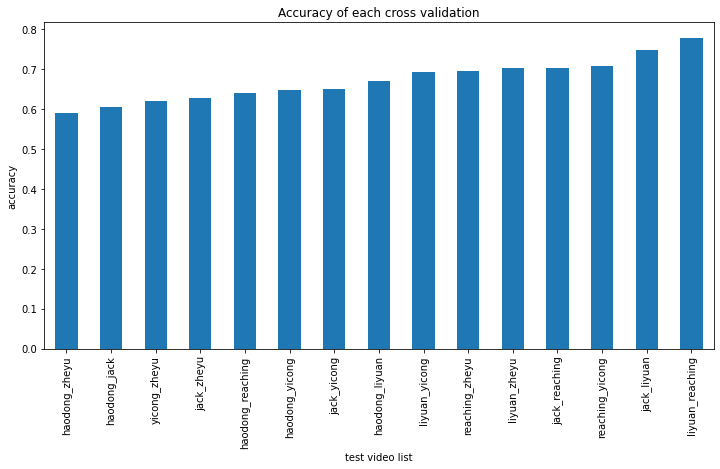

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df.plot.bar(ax=ax, title="Accuracy of each cross validation", xlabel="test video list", ylabel="accuracy", legend=False)

In [7]:
fig.tight_layout()
fig.savefig("../img/accuracy.png",dpi=300)

In [8]:
map_list = [np.mean(evaluation[3]["ap_list"]) for evaluation in evaluation_list]
map_list

[0.2409843135303666,
 0.3076279220915399,
 0.35322014942036495,
 0.34621526975458167,
 0.3262340418602133,
 0.3468972997851897,
 0.3635292282162126,
 0.3704774371606208,
 0.3449716466384381,
 0.4388002989150425,
 0.3890169096067753,
 0.4407977199823151,
 0.4135772761520775,
 0.47212379969658014,
 0.410161415282644]

In [9]:
df2 = pd.DataFrame({"mAP": map_list}, index=index_list)
df2

,mAP
haodong_jack,0.240984
haodong_liyuan,0.307628
haodong_reaching,0.353220
haodong_yicong,0.346215
haodong_zheyu,0.326234
jack_liyuan,0.346897
jack_reaching,0.363529
jack_yicong,0.370477
jack_zheyu,0.344972
liyuan_reaching,0.438800


In [10]:
df2.sort_values("mAP", inplace=True)

<AxesSubplot:title={'center':'mAP of each cross validation'}, xlabel='test video list', ylabel='mAP'>

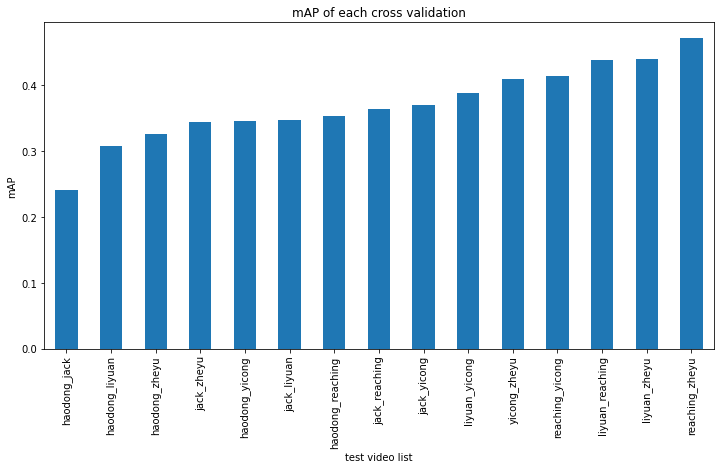

In [13]:
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 6))
df2.plot.bar(ax=ax2, title="mAP of each cross validation", xlabel="test video list", ylabel="mAP", legend=False)

In [14]:
fig2.tight_layout()
fig2.savefig("../img/mAP.png",dpi=300)